In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/03/01','2007/04/01', data_path)

100%|██████████| 46/46 [07:03<00:00,  9.20s/it]


In [3]:
# Get periods of length 15
periods = market.get_periods_fast(period_length=1800)
print(f"Number of periods: {len(periods)}")

100%|██████████| 8577796/8577796 [07:22<00:00, 19390.10it/s]


Number of periods: 351


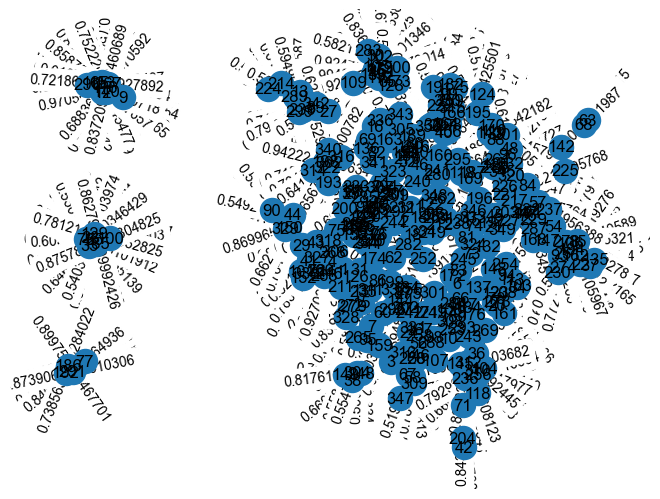

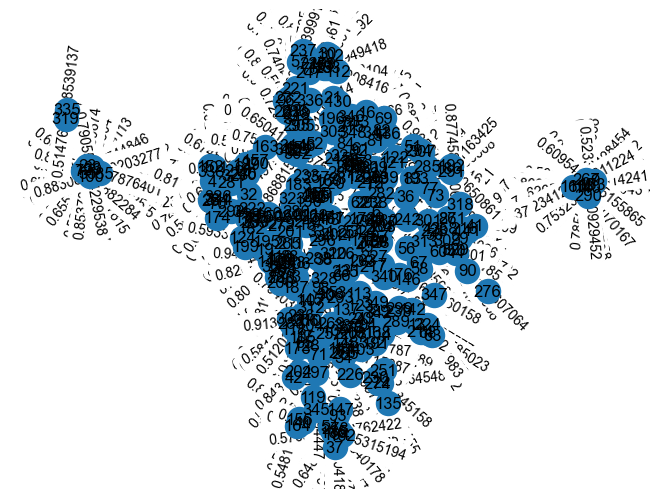

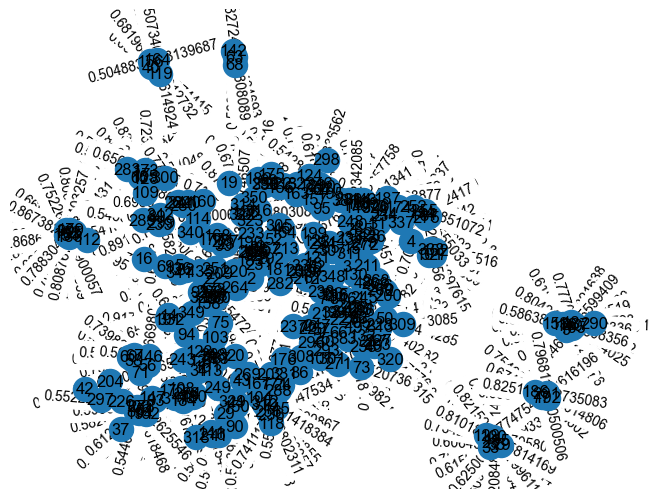

In [4]:
# Build the graph
state_graph_s = market.build_graph(periods, threshold=0.5, inter=True, filter_type='s')
state_graph_g = market.build_graph(periods, threshold=0.5, inter=True, filter_type='g')
state_graph_delta = market.build_graph(periods, threshold=0.5, inter=True, filter_type='delta')

---
### 2 - Clustering

### 2.1 - Louvain Clustering

Filter type: s
Number of nodes: 341
Number of edges: 1092
Number of periods: 351
Number of clusters: 23
Cluster sizes: [20, 19, 23, 22, 8, 18, 10, 28, 15, 20, 10, 7, 16, 19, 9, 10, 9, 4, 24, 13, 30, 5, 0]
Transition matrix: 
[[0.1        0.05       0.05       0.1        0.1        0.05
  0.         0.2        0.05       0.05       0.05       0.
  0.         0.05       0.         0.         0.         0.
  0.05       0.         0.05       0.         0.05      ]
 [0.         0.         0.05263158 0.05263158 0.         0.
  0.         0.10526316 0.05263158 0.15789474 0.         0.
  0.05263158 0.05263158 0.         0.05263158 0.         0.
  0.21052632 0.         0.15789474 0.05263158 0.        ]
 [0.04347826 0.04347826 0.08695652 0.         0.04347826 0.
  0.08695652 0.08695652 0.04347826 0.04347826 0.         0.04347826
  0.         0.04347826 0.         0.04347826 0.04347826 0.
  0.17391304 0.08695652 0.08695652 0.         0.        ]
 [0.         0.         0.         0.09090909 0.   

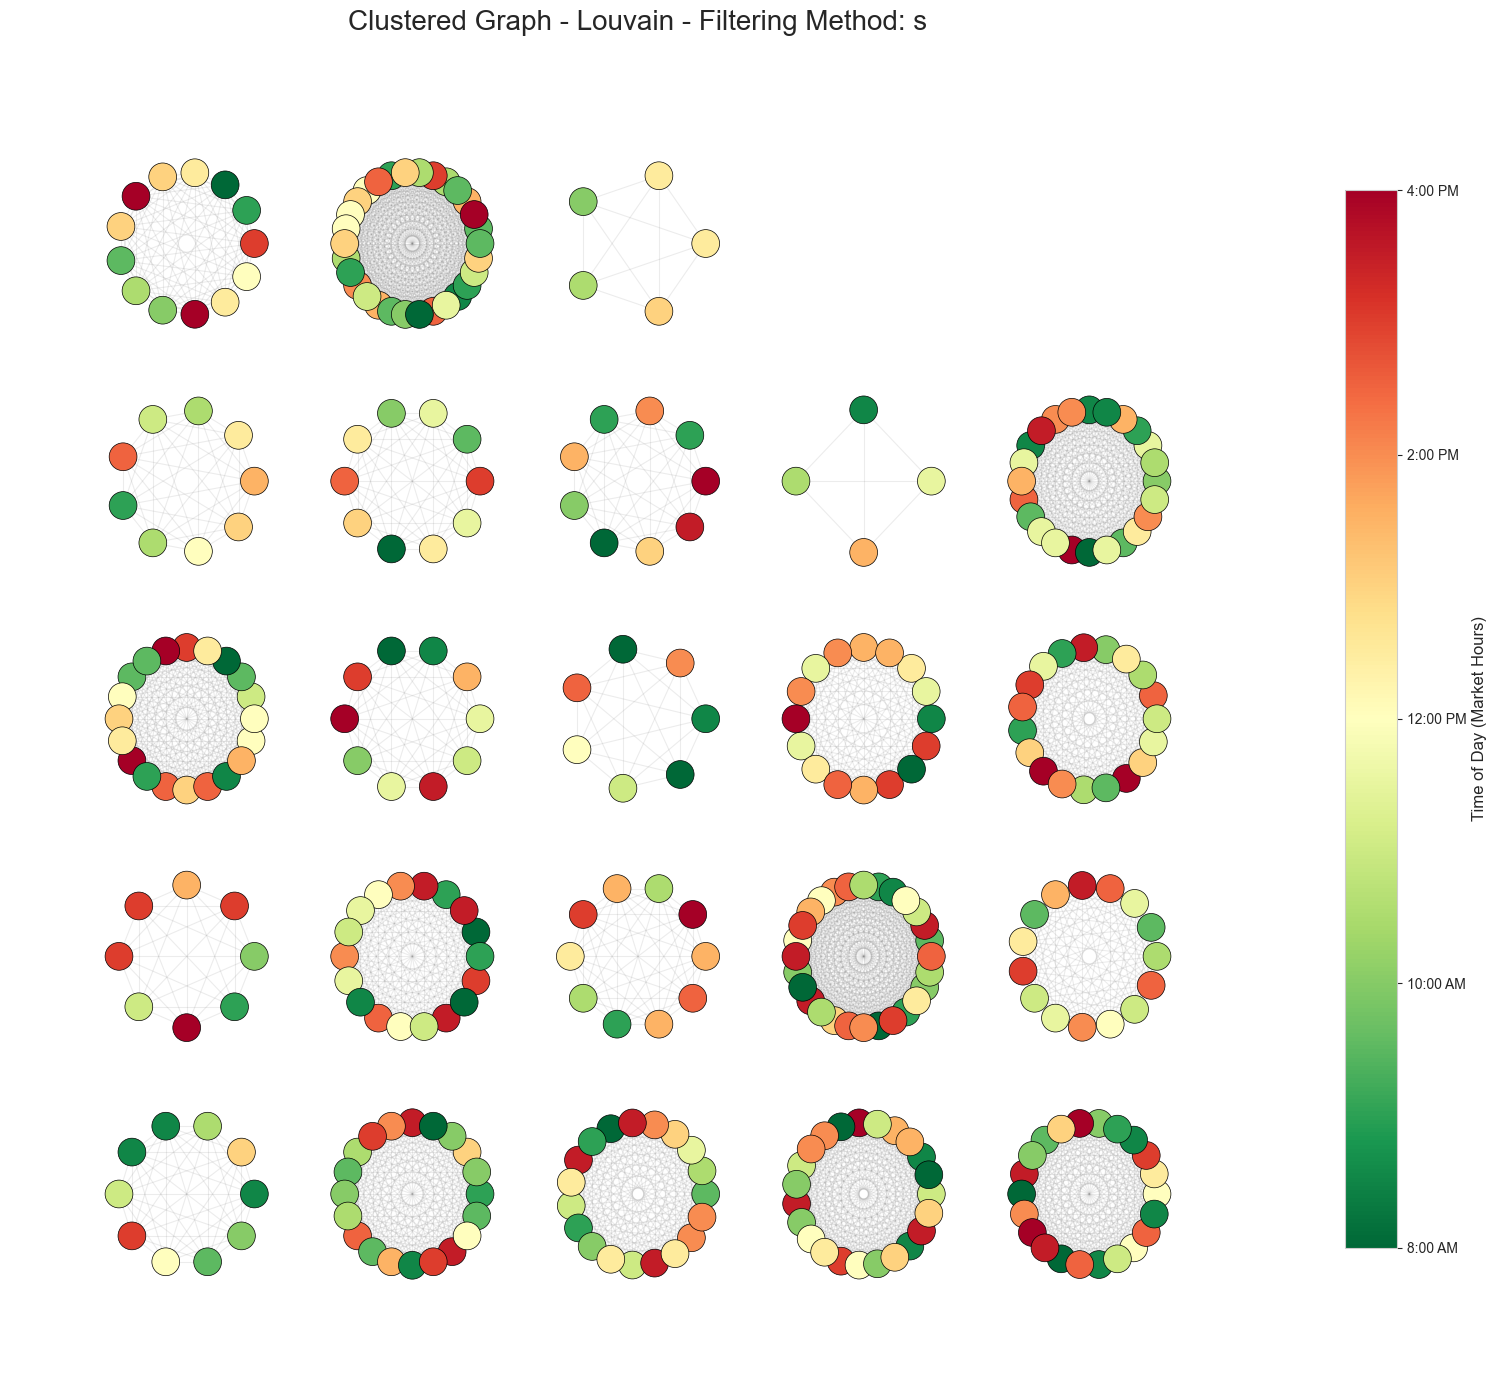

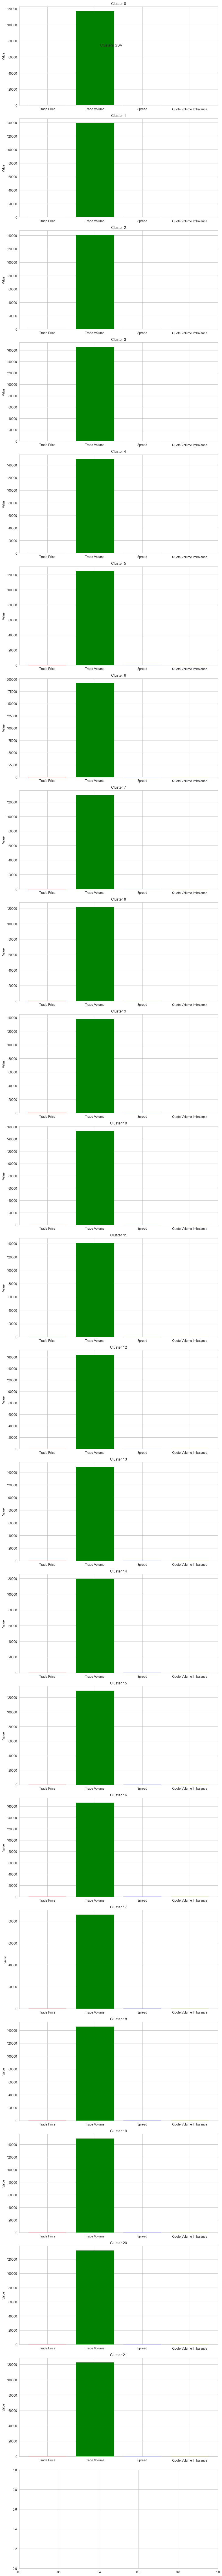

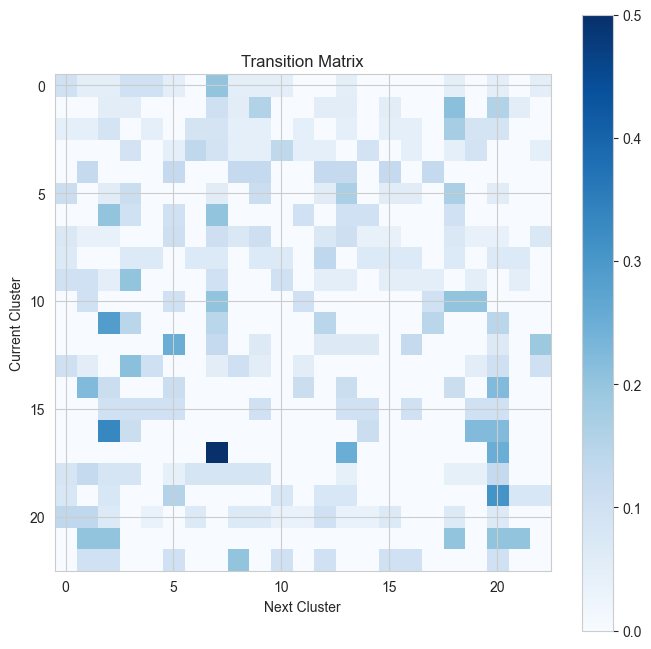

Filter type: g
Number of nodes: 342
Number of edges: 1094
Number of periods: 351
Number of clusters: 24
Cluster sizes: [20, 9, 27, 18, 12, 8, 14, 5, 18, 27, 29, 7, 15, 17, 24, 10, 10, 4, 15, 20, 9, 20, 2, 0]
Transition matrix: 
[[0.1        0.         0.1        0.1        0.         0.1
  0.         0.         0.05       0.15       0.05       0.
  0.05       0.         0.1        0.         0.         0.05
  0.05       0.05       0.         0.05       0.         0.        ]
 [0.         0.         0.11111111 0.11111111 0.         0.
  0.11111111 0.         0.         0.11111111 0.         0.11111111
  0.         0.         0.22222222 0.11111111 0.         0.
  0.         0.         0.         0.11111111 0.         0.        ]
 [0.07407407 0.07407407 0.07407407 0.07407407 0.07407407 0.
  0.03703704 0.         0.14814815 0.07407407 0.07407407 0.
  0.03703704 0.         0.07407407 0.03703704 0.         0.
  0.03703704 0.07407407 0.         0.03703704 0.         0.        ]
 [0.         0

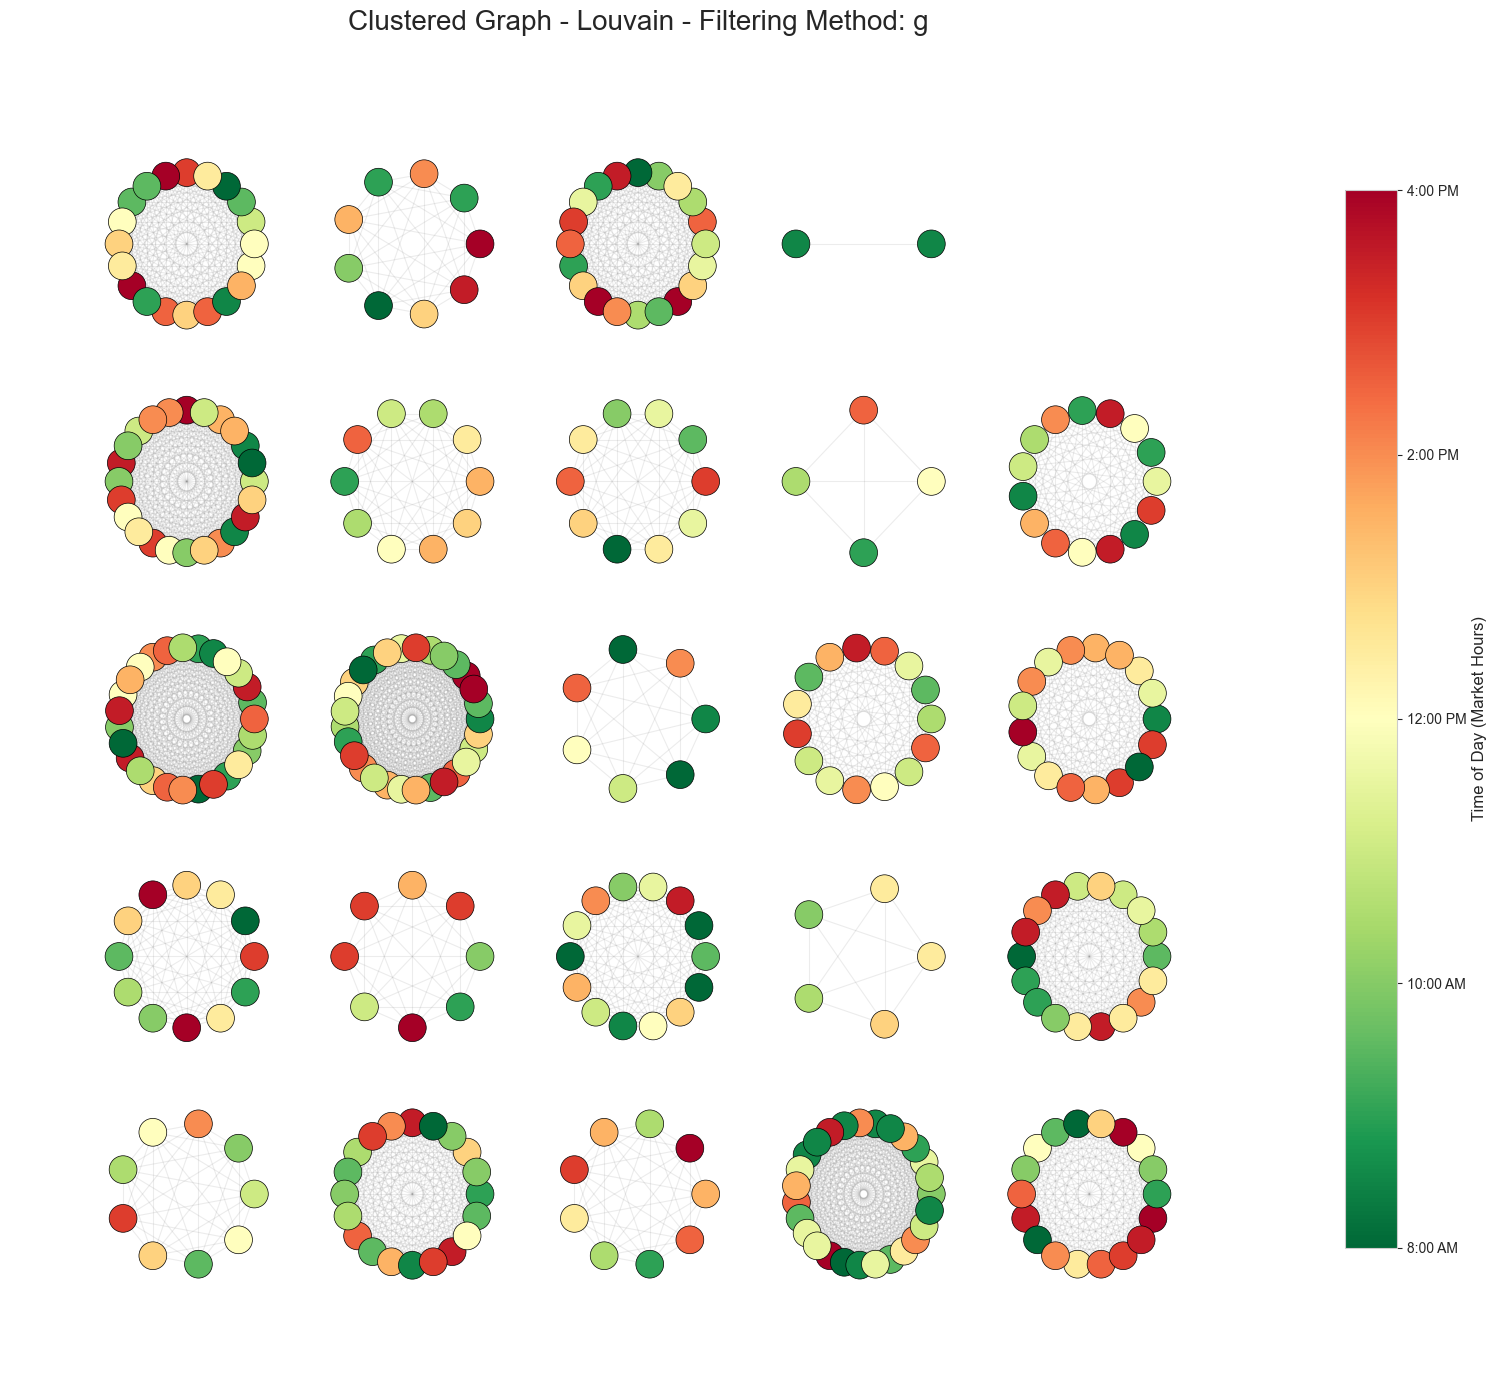

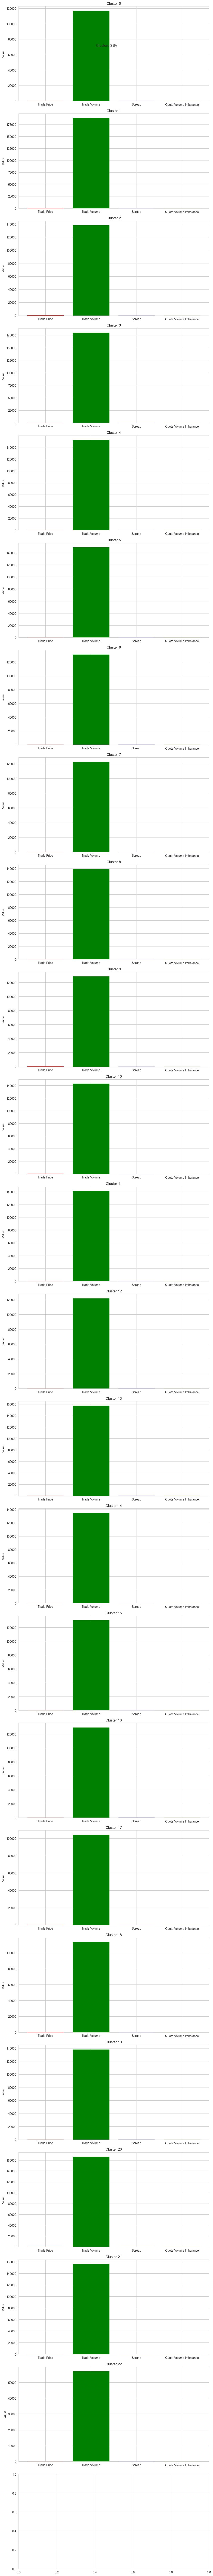

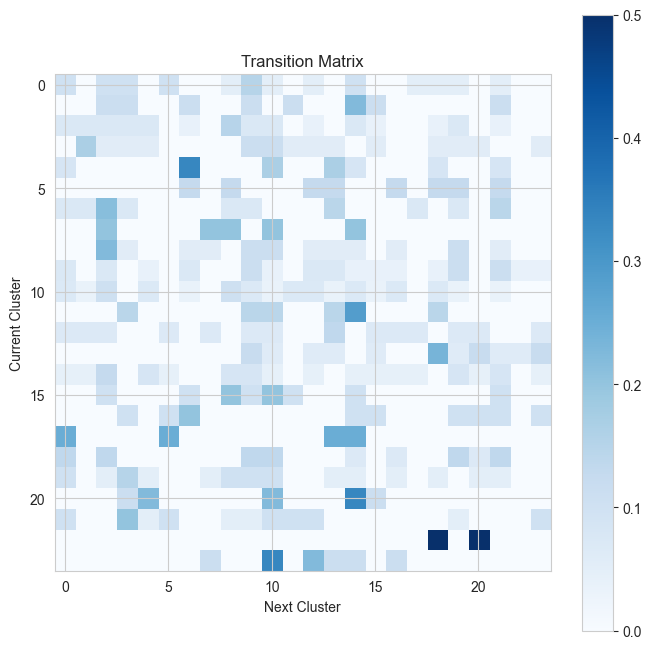

Filter type: delta
Number of nodes: 325
Number of edges: 912
Number of periods: 351
Number of clusters: 26
Cluster sizes: [19, 21, 12, 8, 11, 20, 5, 15, 31, 7, 17, 8, 23, 10, 11, 10, 4, 15, 24, 3, 4, 11, 9, 19, 6, 0]
Transition matrix: 
[[0.05263158 0.05263158 0.         0.10526316 0.10526316 0.10526316
  0.         0.05263158 0.         0.         0.10526316 0.
  0.05263158 0.         0.         0.         0.05263158 0.
  0.15789474 0.         0.         0.05263158 0.         0.
  0.         0.10526316]
 [0.04761905 0.         0.         0.         0.04761905 0.23809524
  0.         0.04761905 0.04761905 0.         0.0952381  0.04761905
  0.0952381  0.         0.         0.         0.         0.
  0.04761905 0.04761905 0.04761905 0.04761905 0.         0.14285714
  0.         0.        ]
 [0.08333333 0.         0.         0.         0.         0.
  0.         0.         0.41666667 0.         0.         0.
  0.08333333 0.08333333 0.         0.         0.         0.16666667
  0.         

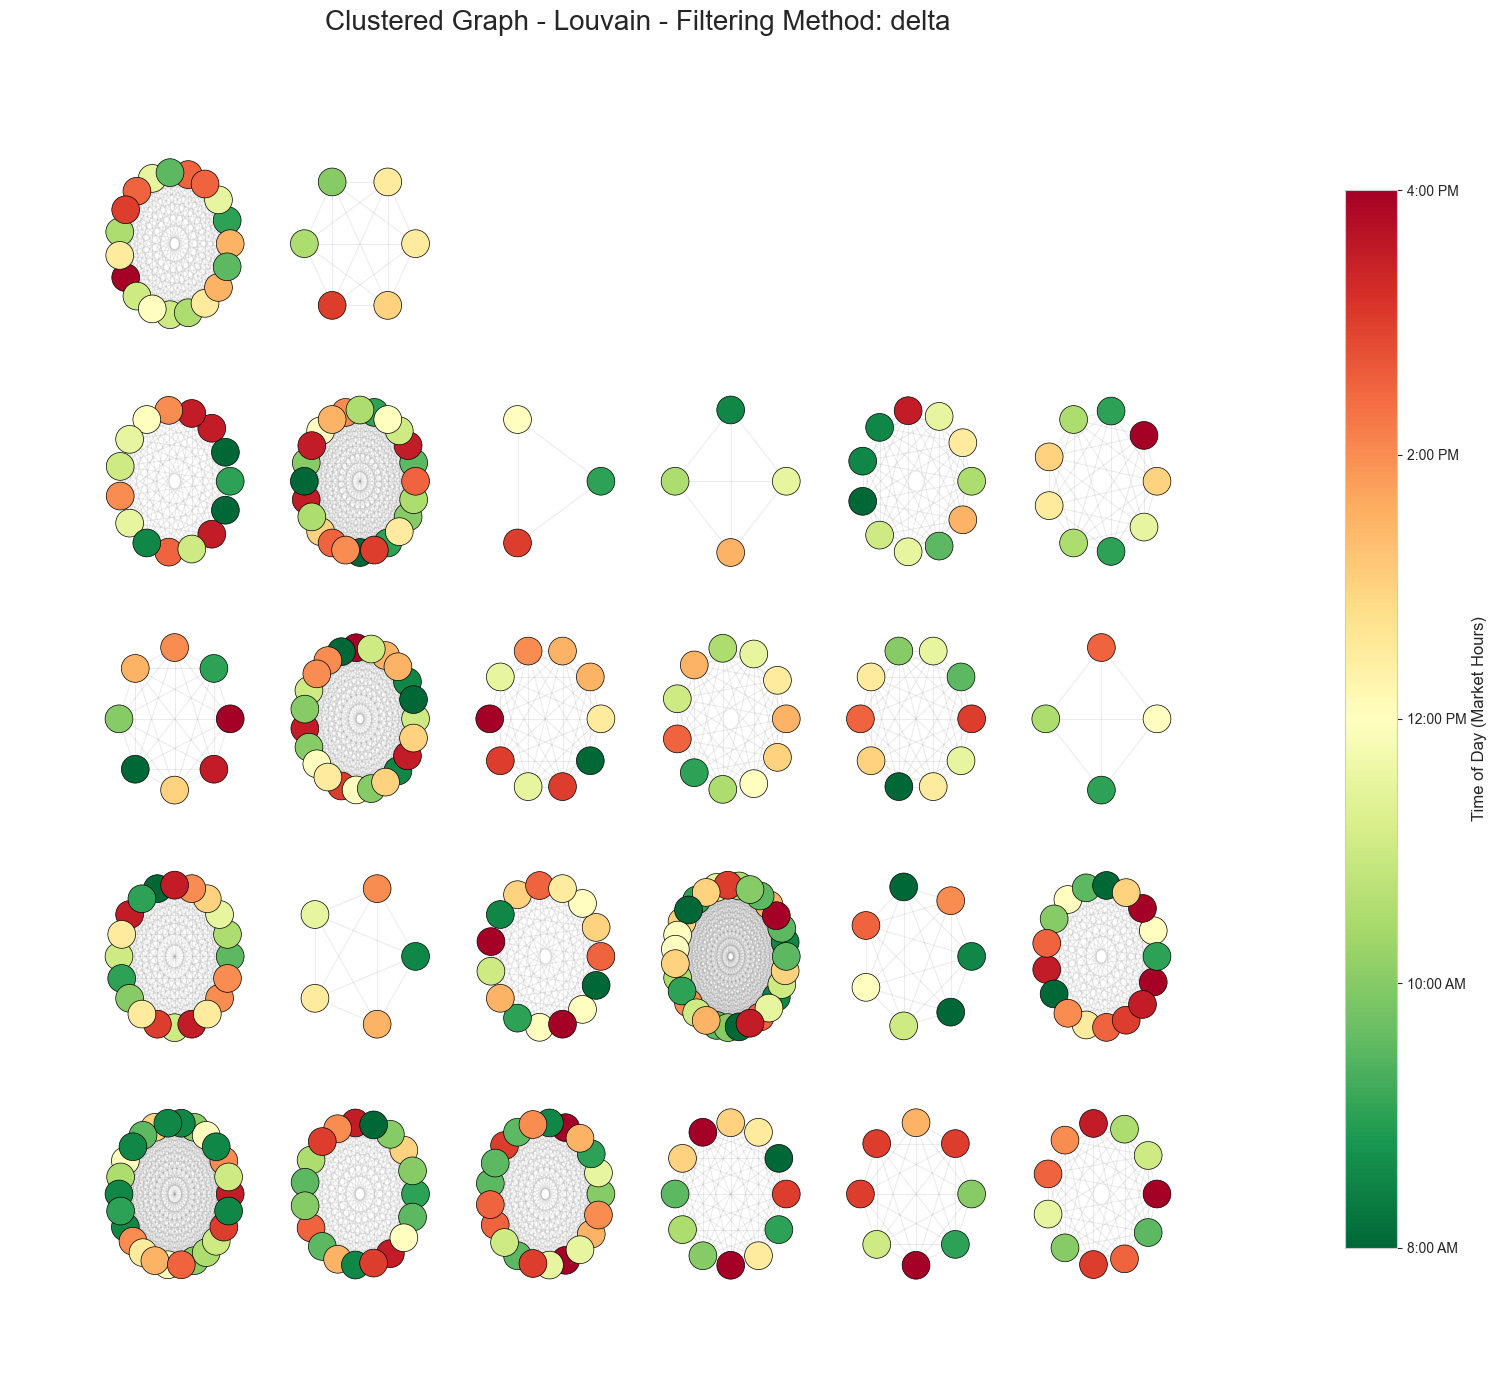

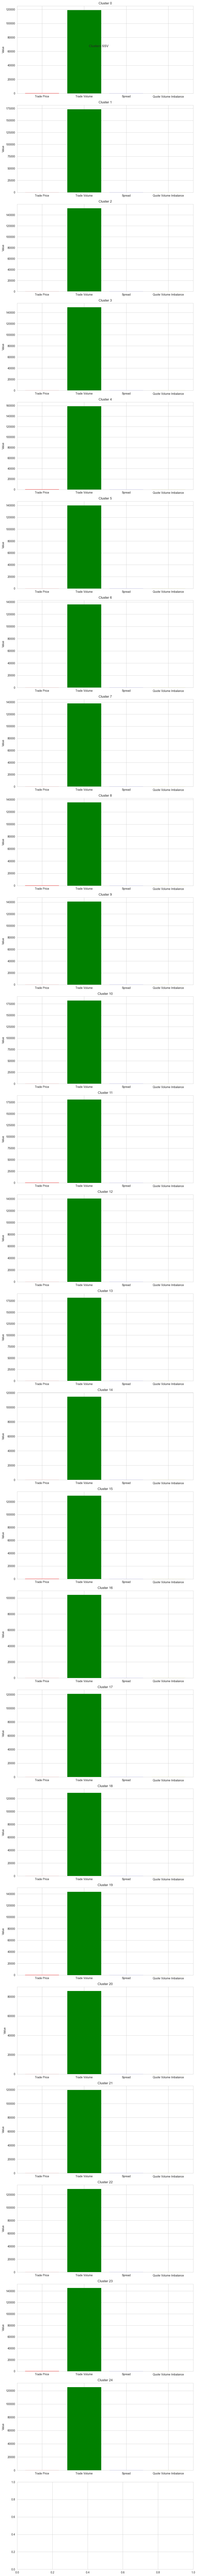

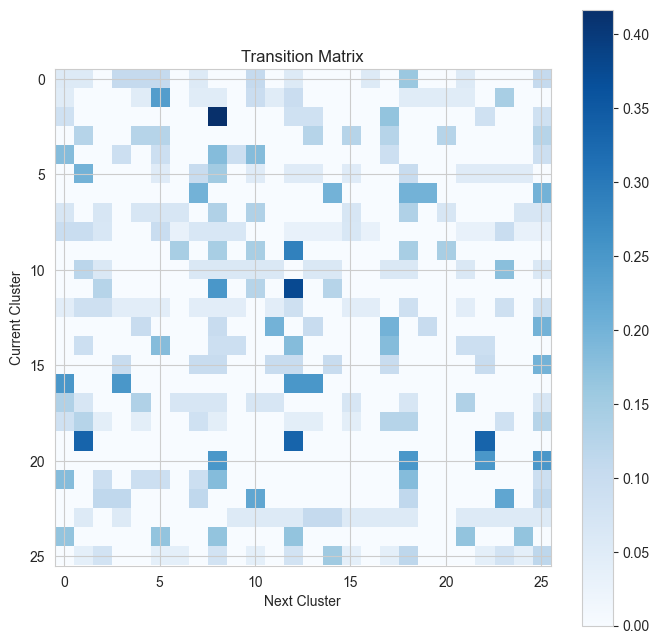

In [8]:
graphs = {
    's': state_graph_s,
    'g': state_graph_g,
    'delta': state_graph_delta
}

for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = LouvainClustering().fit(periods, G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_community_graph(method=f'Louvain - Filtering Method: {filter_type}')
    clustering.plot_ssv()
    clustering.plot_transition_matrix()

### 2.2 - Greedy Clustering

Filter type: s
Number of nodes: 341
Number of edges: 1092
Number of periods: 351
Number of clusters: 22
Cluster sizes: [36, 34, 32, 31, 26, 22, 20, 18, 16, 16, 12, 11, 11, 10, 9, 8, 7, 7, 5, 4, 4, 0]
Transition matrix: 
[[0.11111111 0.16666667 0.11111111 0.05555556 0.         0.05555556
  0.05555556 0.08333333 0.02777778 0.05555556 0.02777778 0.02777778
  0.05555556 0.02777778 0.         0.         0.02777778 0.08333333
  0.         0.02777778 0.         0.        ]
 [0.05882353 0.05882353 0.08823529 0.05882353 0.02941176 0.08823529
  0.05882353 0.14705882 0.05882353 0.02941176 0.02941176 0.02941176
  0.05882353 0.05882353 0.02941176 0.02941176 0.02941176 0.
  0.02941176 0.         0.02941176 0.        ]
 [0.09375    0.09375    0.09375    0.125      0.0625     0.03125
  0.0625     0.         0.03125    0.125      0.03125    0.03125
  0.         0.         0.         0.0625     0.03125    0.
  0.03125    0.         0.03125    0.0625    ]
 [0.09677419 0.03225806 0.12903226 0.06451613 0.0

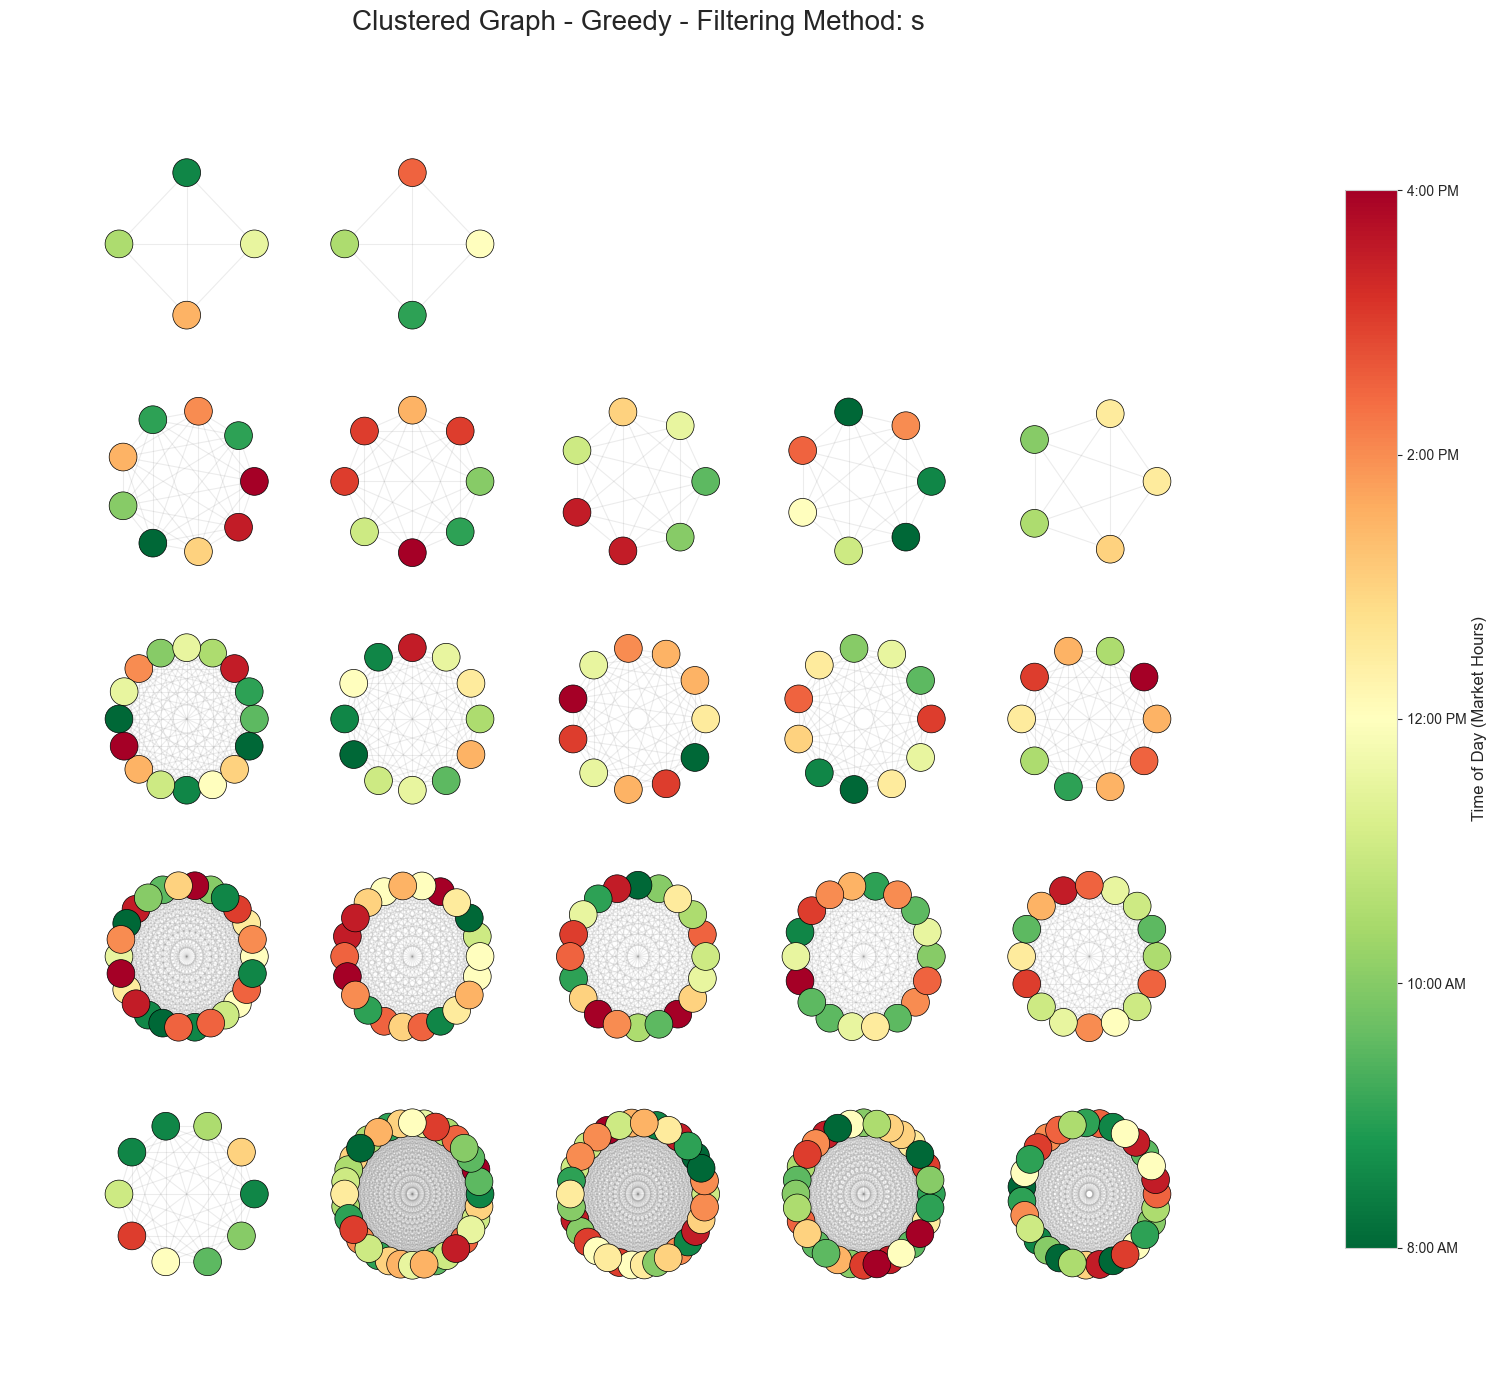

[array([ 1.96967143e-04,  1.78689337e-01,  8.85595286e-02, -4.51548766e-01]), array([ 2.38501017e-05,  2.92355474e-01,  1.25824769e-01, -2.92672286e-01]), array([-6.55565136e-04,  2.06144623e-01,  2.02290174e+00,  4.43323068e-01]), array([ 9.47420328e-05,  3.12829602e-02,  3.28344730e+00, -4.57804562e+00]), array([-0.0004981 ,  0.11353232,  0.07646104,  0.39823984]), array([ 8.95672498e-04,  2.24112227e-01,  2.00407556e+00, -1.27783301e+00]), array([2.92103365e-04, 2.22934069e-01, 1.92524192e-01, 1.66798134e+00]), array([-1.26519464e-04,  4.24643231e-01,  9.11161020e-02,  2.79932470e+00]), array([ 2.14529130e-04,  2.47818468e-01,  7.93034200e-02, -1.58363063e+00]), array([ 0.00126145,  0.18112791,  0.26400347, -0.90016378]), array([-4.87078129e-04,  2.33456437e-01,  1.79456839e-01, -7.90947479e-01]), array([ 9.62106769e-04,  3.60136397e-01,  1.95076567e+00, -6.40001056e-01]), array([1.05839853e-04, 2.12634338e-01, 1.47752285e-01, 3.99039877e-01]), array([-5.41740582e-04,  7.30874488e-0

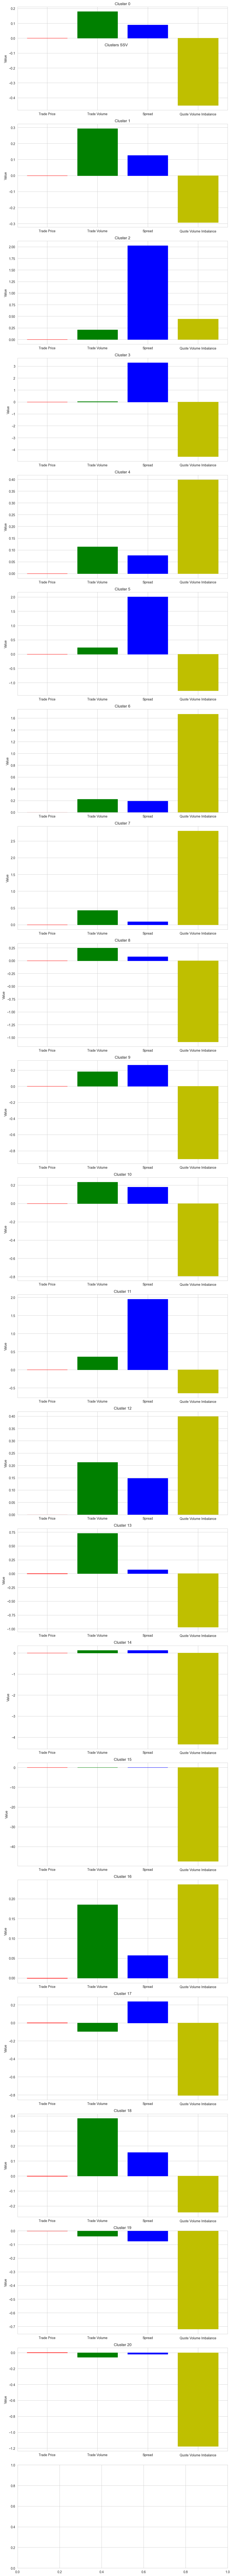

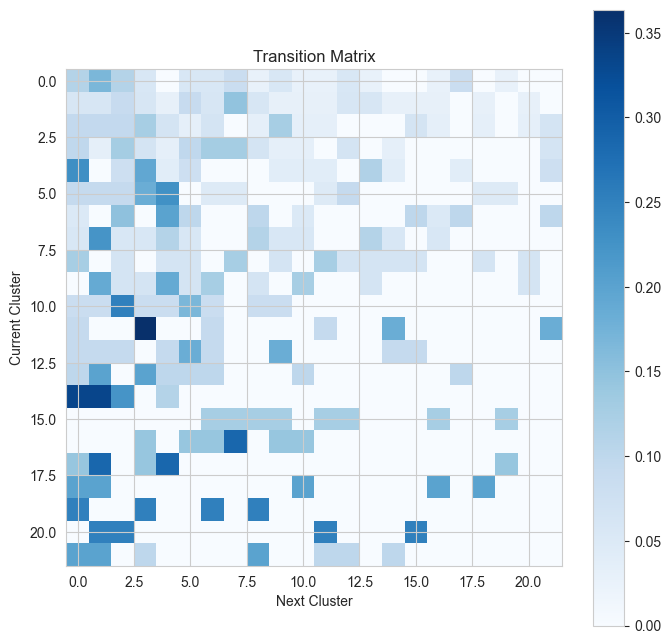

Filter type: g
Number of nodes: 342
Number of edges: 1094
Number of periods: 351
Number of clusters: 23
Cluster sizes: [36, 33, 31, 30, 22, 22, 22, 19, 16, 16, 12, 12, 11, 10, 9, 9, 8, 7, 5, 4, 4, 2, 0]
Transition matrix: 
[[0.11111111 0.16666667 0.11111111 0.05555556 0.05555556 0.05555556
  0.08333333 0.02777778 0.02777778 0.         0.02777778 0.02777778
  0.05555556 0.02777778 0.         0.05555556 0.         0.08333333
  0.         0.02777778 0.         0.         0.        ]
 [0.06060606 0.06060606 0.06060606 0.09090909 0.06060606 0.06060606
  0.18181818 0.06060606 0.06060606 0.03030303 0.03030303 0.03030303
  0.03030303 0.03030303 0.03030303 0.03030303 0.03030303 0.
  0.03030303 0.         0.         0.         0.03030303]
 [0.09677419 0.12903226 0.09677419 0.12903226 0.12903226 0.03225806
  0.03225806 0.03225806 0.03225806 0.06451613 0.03225806 0.06451613
  0.         0.         0.         0.03225806 0.06451613 0.
  0.         0.         0.03225806 0.         0.        ]
 [0.066

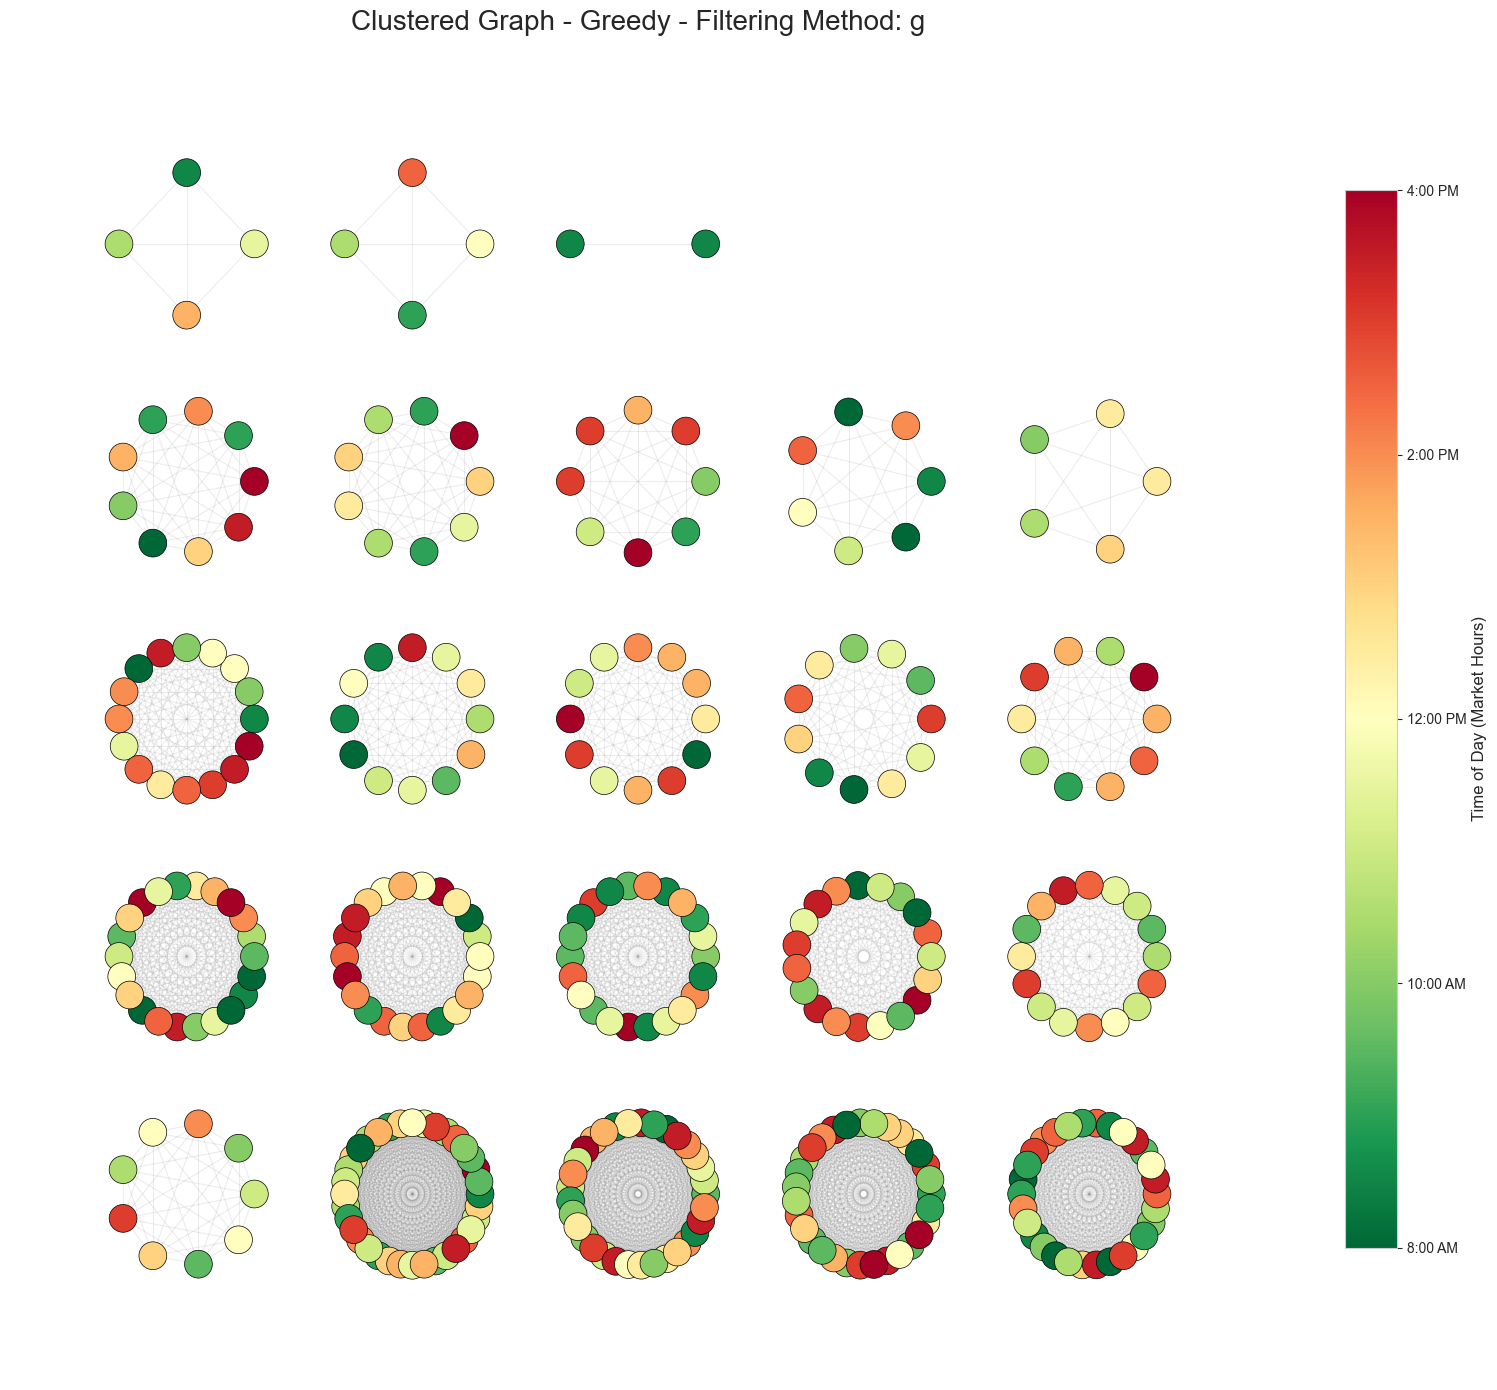

[array([ 1.96967143e-04,  1.78689337e-01,  8.85595286e-02, -4.51548766e-01]), array([-1.36212017e-04,  3.34407300e-01,  1.32011752e-01, -2.78355607e-01]), array([-7.04458802e-04,  2.13064113e-01,  2.09036141e+00,  5.97206219e-01]), array([ 9.14927275e-05,  3.67189546e-02,  3.38723843e+00, -4.68428889e+00]), array([ 8.81654221e-04,  1.59502815e-01,  2.88965045e-01, -2.65144810e+00]), array([ 8.95672498e-04,  2.24112227e-01,  2.00407556e+00, -1.27783301e+00]), array([-4.93388010e-04,  3.37141672e-01,  3.18705713e-02, -1.19353042e+00]), array([1.58422057e-04, 1.44863545e-01, 1.71373303e-01, 1.36415051e+00]), array([ 2.14529130e-04,  2.47818468e-01,  7.93034200e-02, -1.58363063e+00]), array([-3.93918363e-04,  1.44187670e-01,  4.85157858e-02,  3.63708977e+00]), array([-4.87078129e-04,  2.33456437e-01,  1.79456839e-01, -7.90947479e-01]), array([ 9.38282859e-04,  3.72019125e-01,  1.80564552e+00, -3.66842834e-01]), array([1.05839853e-04, 2.12634338e-01, 1.47752285e-01, 3.99039877e-01]), array(

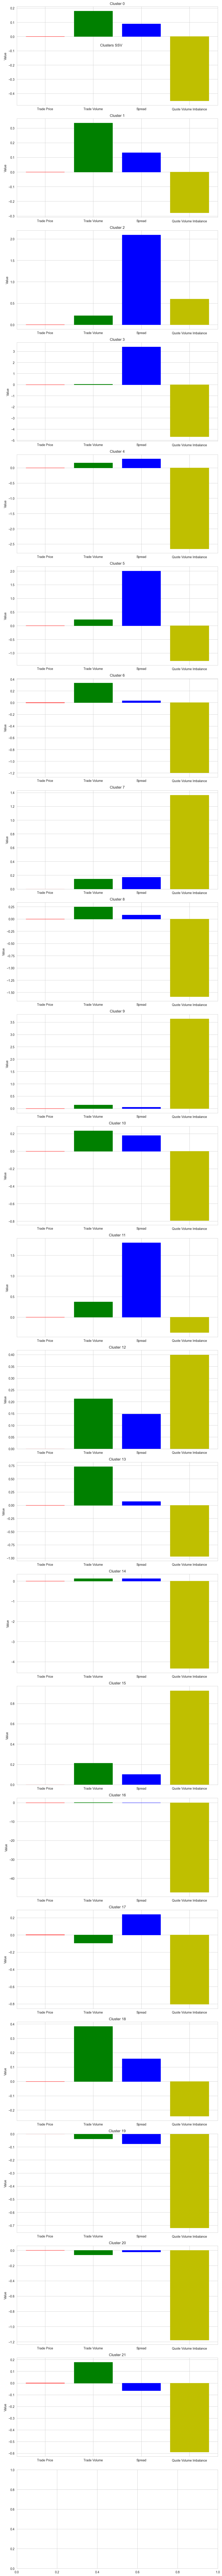

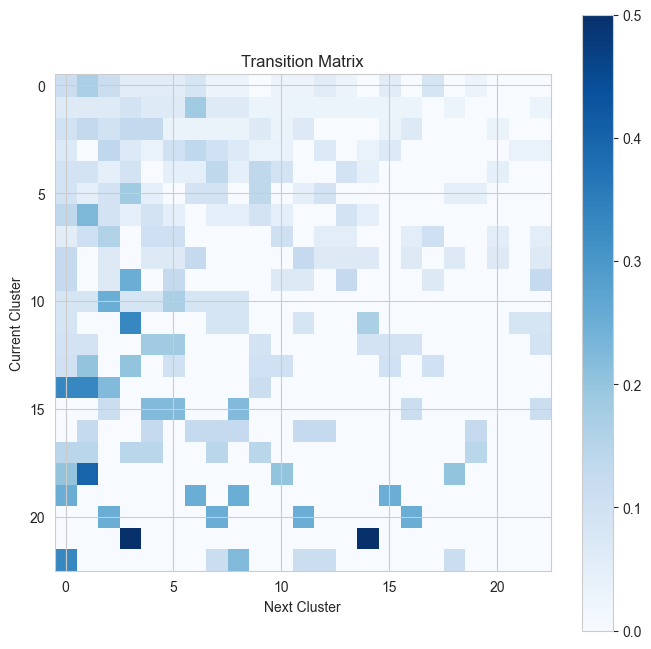

Filter type: delta
Number of nodes: 325
Number of edges: 912
Number of periods: 351
Number of clusters: 24
Cluster sizes: [40, 33, 31, 30, 21, 21, 17, 14, 11, 11, 11, 11, 10, 9, 8, 8, 8, 7, 6, 5, 4, 4, 3, 0]
Transition matrix: 
[[0.175      0.         0.075      0.1        0.1        0.1
  0.025      0.075      0.075      0.05       0.05       0.
  0.025      0.         0.         0.         0.025      0.
  0.         0.025      0.         0.         0.         0.1       ]
 [0.09090909 0.09090909 0.12121212 0.06060606 0.06060606 0.18181818
  0.03030303 0.06060606 0.03030303 0.03030303 0.03030303 0.
  0.03030303 0.03030303 0.03030303 0.         0.03030303 0.
  0.03030303 0.         0.         0.         0.         0.06060606]
 [0.03225806 0.09677419 0.06451613 0.16129032 0.03225806 0.09677419
  0.         0.03225806 0.06451613 0.03225806 0.03225806 0.03225806
  0.03225806 0.03225806 0.         0.06451613 0.         0.06451613
  0.03225806 0.03225806 0.         0.03225806 0.         0.03

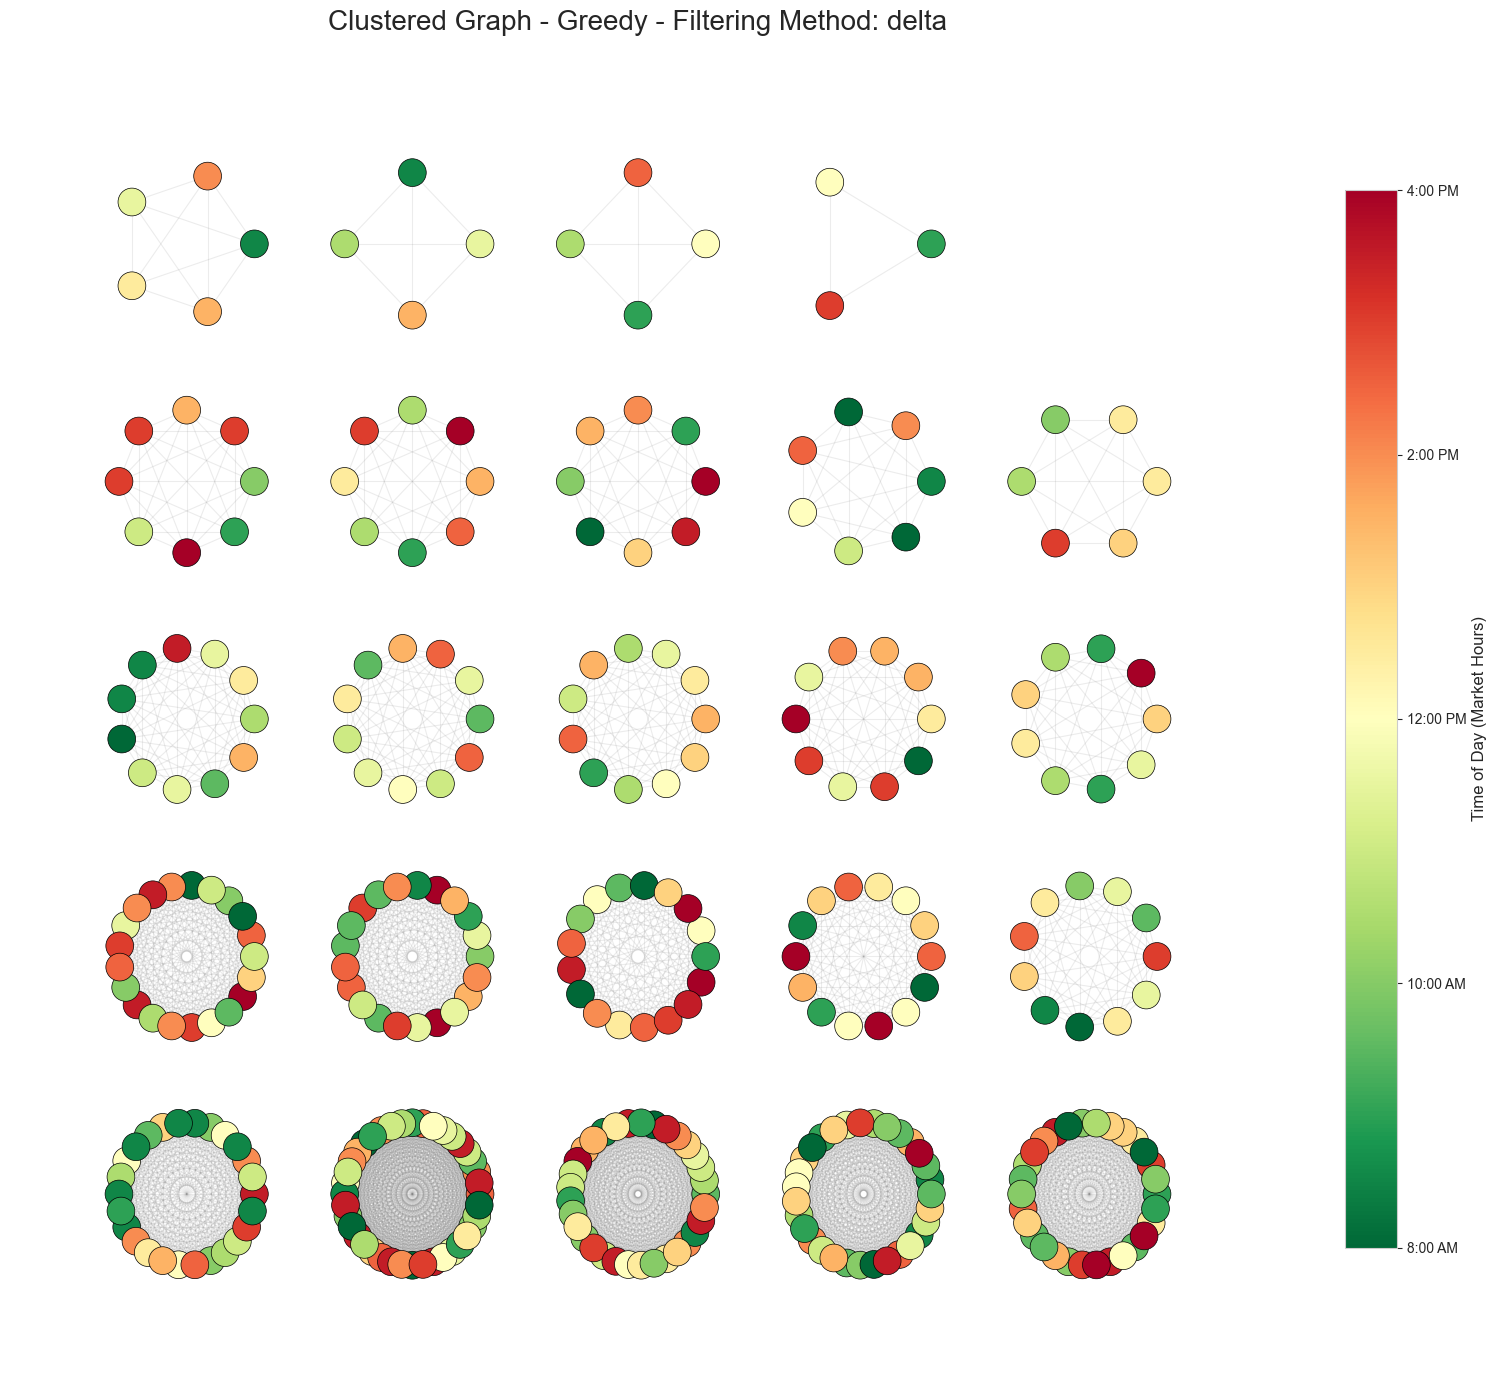

[array([ 4.88040533e-04,  1.21749467e-01,  2.60466851e+00, -3.95074476e+00]), array([-3.98024705e-05,  3.16087093e-01,  1.17173826e-01, -3.56999799e-01]), array([ 2.62986099e-04,  1.27507447e-01,  1.30219051e-01, -1.13194124e+00]), array([-7.35769792e-04,  2.08834824e-01,  2.15462528e+00,  6.50862734e-01]), array([1.32196442e-04, 1.65925853e-01, 1.77576462e-01, 1.43047115e+00]), array([ 3.53161476e-05,  4.47402789e-01,  6.97794501e-02, -1.13346010e+00]), array([-5.07823359e-05,  2.05584083e-01,  2.08166839e-01,  7.58688803e-01]), array([ 6.70168577e-04,  1.60842875e-01,  3.18889766e+00, -1.02173604e+00]), array([1.05839853e-04, 2.12634338e-01, 1.47752285e-01, 3.99039877e-01]), array([-6.10536320e-04,  2.55521946e-01,  1.60680211e-01, -8.33409895e-01]), array([ 1.10888376e-04,  2.99622996e-01,  8.99460955e-02, -9.27521644e-01]), array([0.00055964, 0.16915376, 0.09534798, 0.3108968 ]), array([ 1.05355110e-03,  3.42691102e-01,  2.14868879e+00, -4.66004471e-01]), array([5.62151462e-04, 2.1

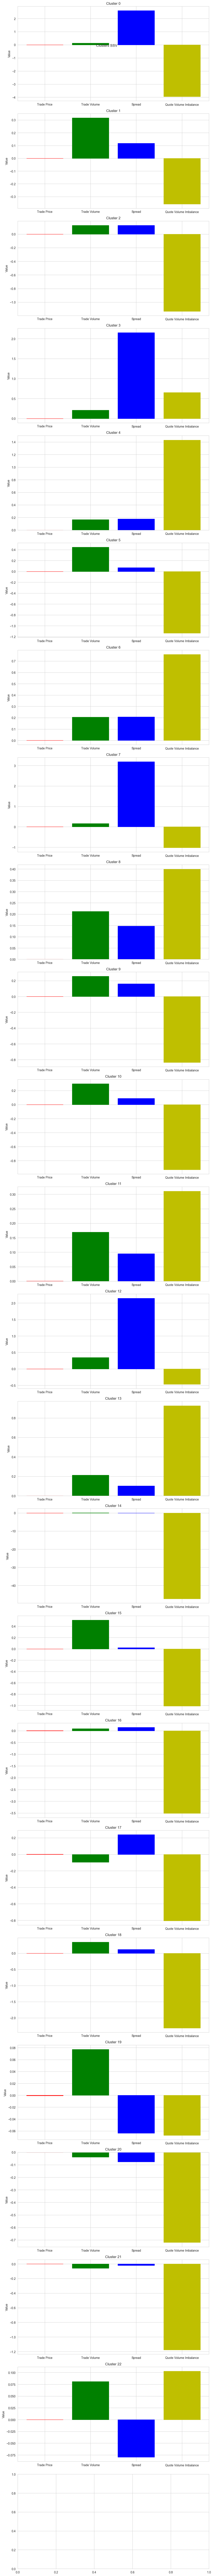

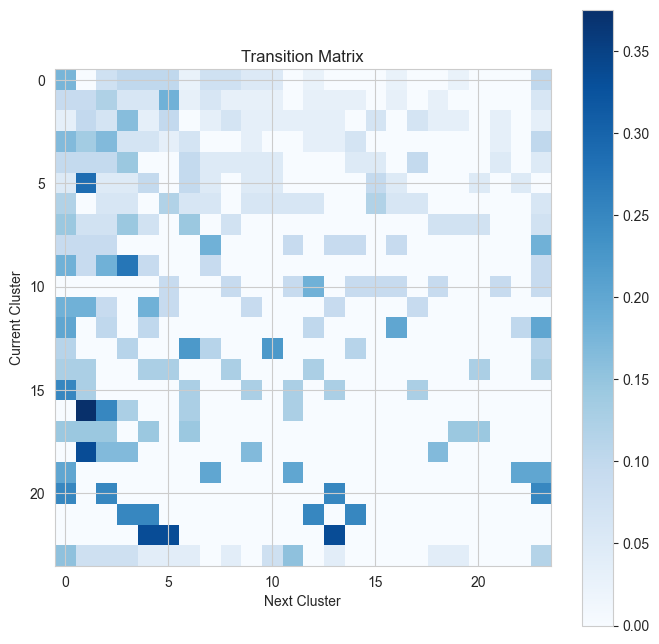

In [9]:
for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = GreedyClustering().fit(periods,  G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_community_graph(method=f'Greedy - Filtering Method: {filter_type}')
    clustering.plot_ssv()
    clustering.plot_transition_matrix()